## Кейс №1

Вам необходимо исправить код таким образом, чтобы нейронная сеть могла обучаться всем 10 цифрам. А затем оценить обученную модель. Настраивая параметры обучения, постарайтесь добиться значений точности не менее **90%**.

In [1]:
#импортируем библиотеки
import matplotlib.pyplot as plt #matplotlib для визуализации
import numpy as np #numpy для работа с матрицами
import pandas as pd #для хранения истории обучения и ее визуализации
from sklearn.metrics import classification_report#отчет по классификации
from sklearn.metrics import confusion_matrix #матрица ошибок
from sklearn.datasets import load_digits #загрузчик датасетов
from sklearn.model_selection import train_test_split #авторазбиение
from tensorflow.keras.models import Sequential #последовательная модель (прямого распространения)
from tensorflow.keras.layers import Dense #полносвязный слой
from tensorflow.keras import optimizers #оптимизаторы
from tensorflow.keras.utils import to_categorical #преобразование в категориальные данные


#загружаем датасет с рукописными цифрами
digits = load_digits()

In [2]:
#изучим форматы хранения
print('Количество изображений и их ширина и высота: ', digits.images.shape) #1797 изображений размером 8x8
print('Количество объектов и признаков в данных: ', digits.data.shape) #1797 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток: ', digits.target.shape) #1797 лейблов

Количество изображений и их ширина и высота:  (1797, 8, 8)
Количество объектов и признаков в данных:  (1797, 64)
Количество меток:  (1797,)


Text(0.5, 1.0, 'image label: 1')

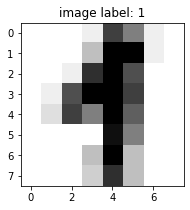

In [3]:
#выведем одно изображение для примера
sample_index = 90 #номер случайного изображения
plt.figure(figsize=(3, 3)) #размер фигуры для визуализации
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest') #вывод изображения в ч/б формате
plt.title("image label: %d" % digits.target[sample_index]) #подпись изображения с классом картинки

In [4]:
# Загрузка датасета digits из sklearn.datasets и преобразование данных и меток в массивы numpy
X = np.asarray(digits.data, dtype='float32')
y = np.asarray(digits.target, dtype='int32')

In [5]:
# Разделение данных на обучающую и тестовую выборки в соотношении 85:15 с использованием функции train_test_split из sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=37)

In [6]:
# Преобразование меток классов из целочисленного формата в one-hot encoded формат с помощью функции to_categorical из keras.utils
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

In [7]:
# Инициализация размерности входного, скрытого и выходного слоев нейронной сети
input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = Y_train.shape[1]

In [8]:
# Создание последовательной модели нейронной сети и добавление скрытого и выходного слоев с помощью класса Dense из keras.layers
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="relu"))
model.add(Dense(output_dim, activation="softmax"))

In [9]:
# Компиляция модели с использованием оптимизатора SGD, функции потерь categorical_crossentropy и метрик accuracy из keras
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Обучение модели на обучающих данных, разбитых на обучающую и валидационную выборки в соотношении 80:20 на 50 эпохах с размером пакета 64 с помощью метода fit из keras.models
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
20/20 [==============================] - 2s 17ms/step - loss: 2.3492 - accuracy: 0.4881 - val_loss: 2.9385 - val_accuracy: 0.3529
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.8231 - val_loss: 0.5727 - val_accuracy: 0.7908
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2887 - accuracy: 0.9034 - val_loss: 0.2400 - val_accuracy: 0.9281
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.9345 - val_loss: 0.8716 - val_accuracy: 0.7614
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.9279 - val_loss: 0.5044 - val_accuracy: 0.8660
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.1719 - accuracy: 0.9468 - val_loss: 0.1956 - val_accuracy: 0.9510
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.1306 - accuracy: 0.9648 - val_loss: 0.1607 - val_accuracy: 0.9542
Epoch 8/50
20/20 [=

In [11]:
# Создание pandas DataFrame для отслеживания истории обучения модели
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

<AxesSubplot:xlabel='epoch'>

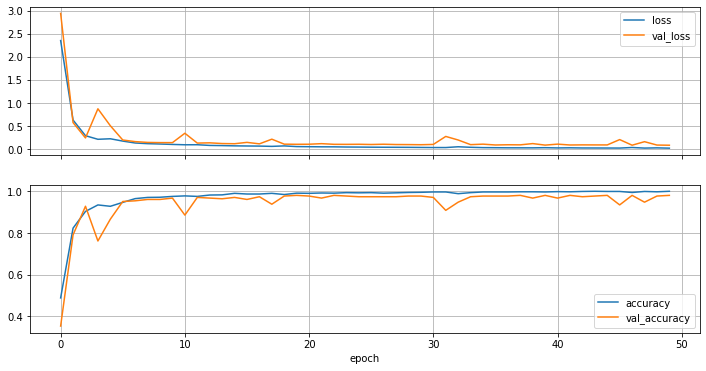

In [12]:
# Создание графика функции потерь и точности модели на обучающей и валидационной выборках с помощью библиотеки matplotlib.pyplot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0, grid=True)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, grid=True)

In [14]:
# Получение предсказанных меток классов на тестовых данных с помощью метода predict из keras.models и преобразование меток классов в формат one-hot encoding с помощью функции argmax() из библиотеки numpy:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(Y_test, axis=1)

# Затем выводится отчет по классификации, который показывает различные метрики качества модели
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

9/9 [==============================] - 0s 4ms/step
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  1  0  0]
 [ 0  0  0  1  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  1  0  0 33  1]
 [ 0  0  0  0  0  0  0  0  1 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        29
           3       0.94      1.00      0.97        17
           4       1.00      0.96      0.98        28
           5       0.97      0.94      0.95        31
           6       1.00      1.00      1.00        26
           7       0.96      1.00      0.98        24
           8       0.97      0.94      0.96        35
           9       0.92      0.96      0.94        24

    accuracy          